# Day 3 作業

## [作業目標]:
熟悉對 HSV 的操作、Histogram equalization,以及二值化的使用。

## [作業重點]:
1. 將 RGB 轉換為 HSV,分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization,並印出處理結果(處理完的圖
片和處理完的 Value)
3. 將 RGB 轉換為 Gray level,再進行單值二值化及自適應二值化



## 解題步驟

1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)
3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

## 先讀取並顯示圖片

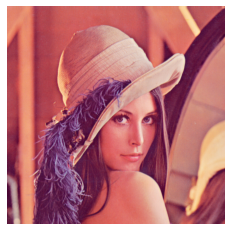

In [2]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

img = cv2.imread('lena.jpg')

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

## 1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value

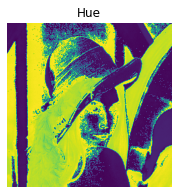

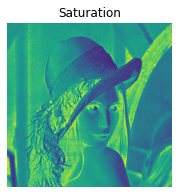

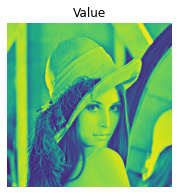

In [41]:
# 將 RGB 轉換為 HSV
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 分別印出 Hue, Saturation, Value
title = ['Hue', 'Saturation', 'Value']
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
for i , c in enumerate(title):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,i+1)
    plt.imshow(img_hsv[:,:,i])
    plt.title(c)
    plt.axis('off')
plt.show()

(-0.5, 511.5, 511.5, -0.5)

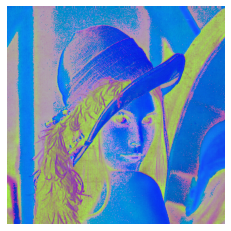

In [4]:
plt.imshow(img_hsv)
plt.axis('off')

## 2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)

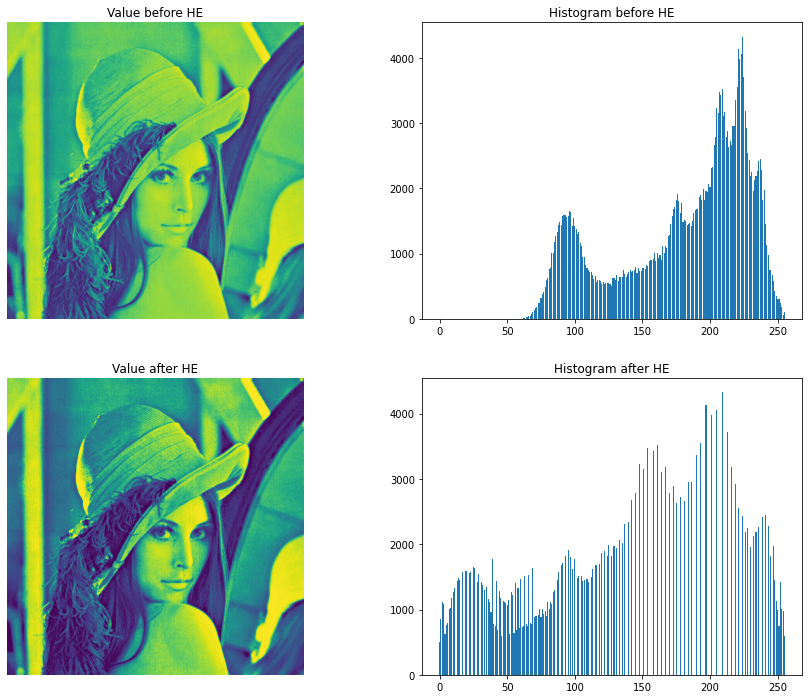

In [35]:
value = img_hsv[:,:,2]
value_he = cv2.equalizeHist(value)
value_hist = cv2.calcHist([value], [0], None, [256], [0, 256])
value_hist_he = cv2.calcHist([value_he], [0], None, [256], [0, 256])
# 先印出 HE 前的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
plt.figure(figsize = (15, 12))
# plt.subplots_adjust(wspace=0,hspace=0.1)
plt.subplot(2, 2, 1, title = 'Value before HE')
plt.imshow(value)
plt.axis('off')
plt.subplot(2, 2, 2, title = 'Histogram before HE')
plt.bar(range(256),value_hist.squeeze())
# 印出 HE 後的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
plt.subplot(2, 2, 3, title = 'Value after HE')
plt.imshow(value_he)
plt.axis('off')
plt.subplot(2, 2, 4, title = 'Histogram after HE')
plt.bar(range(256),value_hist_he.squeeze())
plt.show()

## 3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

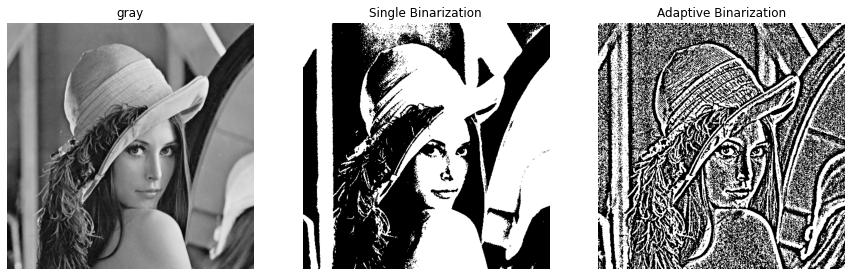

In [19]:
# 將圖片轉換為灰階圖片
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Single Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1, title = 'gray')
plt.imshow(gray, cmap = 'gray')
plt.axis('off')
plt.subplot(1, 3, 2, title = 'Single Binarization')
plt.imshow(thresh, cmap = 'gray')
plt.axis('off')
# Adaptive Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
dst = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 0)
plt.subplot(1, 3, 3, title = 'Adaptive Binarization')
plt.imshow(dst, cmap = 'gray')
plt.axis('off')
plt.show()
